# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
from alpaca_trade_api.rest import REST, TimeFrame 
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [6]:
#Collect the bitcoin data using requests library
btc_data = requests.get(btc_url)
btc_data = btc_data.json()
btc_data

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19466843,
   'total_supply': 19466843,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 26033.0,
     'volume_24h': 13269140080,
     'market_cap': 506707770758,
     'percentage_change_1h': 0.140847898680401,
     'percentage_change_24h': -1.64255654615794,
     'percentage_change_7d': -6.52167739152365,
     'percent_change_1h': 0.140847898680401,
     'percent_change_24h': -1.64255654615794,
     'percent_change_7d': -6.52167739152365},
    'CAD': {'price': 35365.8305,
     'volume_24h': 18026126798.68,
     'market_cap': 688362506574.743,
     'percent_change_1h': 0.140847898680401,
     'percent_change_24h': -1.64255654615794,
     'percent_change_7d': -6.52167739152365}},
   'last_updated': 1692905082}},
 'metadata': {'timestamp': 1692905082,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [7]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_price = btc_data['data']['1']['quotes']['CAD']['price']
btc_price

35365.8305

In [8]:
#Collect the etherium data using requests library
eth_data = requests.get(eth_url)
eth_data = eth_data.json()
eth_data

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120214162,
   'total_supply': 120214162,
   'max_supply': 120214162,
   'quotes': {'USD': {'price': 1646.06,
     'volume_24h': 7619739884,
     'market_cap': 197845380758,
     'percentage_change_1h': 0.104203762704499,
     'percentage_change_24h': -2.03370632625707,
     'percentage_change_7d': -5.07269152199035,
     'percent_change_1h': 0.104203762704499,
     'percent_change_24h': -2.03370632625707,
     'percent_change_7d': -5.07269152199035},
    'CAD': {'price': 2236.17251,
     'volume_24h': 10351416632.414,
     'market_cap': 268772949759.743,
     'percent_change_1h': 0.104203762704499,
     'percent_change_24h': -2.03370632625707,
     'percent_change_7d': -5.07269152199035}},
   'last_updated': 1692905075}},
 'metadata': {'timestamp': 1692905075,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [9]:
# Fetch current ETH price
# YOUR CODE HERE!
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']
eth_price

2236.17251

In [10]:

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc 
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $42439.00
The current value of your 5.3 ETH is $11851.71


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [11]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [12]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = REST(alpaca_api_key, alpaca_secret_key)

In [13]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2023-08-22", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
data_df = api.get_bars(tickers, timeframe, today, today).df

# Preview DataFrame
# YOUR CODE HERE!
data_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-08-22 04:00:00+00:00,95.17,95.32,95.06,95.24,6156222,28446,95.230965,AGG
2023-08-22 04:00:00+00:00,441.18,441.18,437.57,438.15,65062861,476082,438.849150,SPY


In [14]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = data_df.iloc[0][3]
spy_close_price = data_df.iloc[1][3]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $95.24
Current SPY closing price: $438.15


In [15]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21907.50
The current value of your 200 AGG shares is $19048.00


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
total_crypto = my_btc_value + my_eth_value 
total_shares = my_agg_value + my_spy_value


# Create savings DataFrame
# YOUR CODE HERE!
amount = {"amount": [total_crypto, total_shares]}
tickers = ['Crypto', 'Shares']
df_savings = pd.DataFrame(amount, tickers)

# Display savings DataFrame
display(df_savings)

,amount
Crypto,54290.710903
Shares,40955.500000


<Axes: ylabel='amount'>

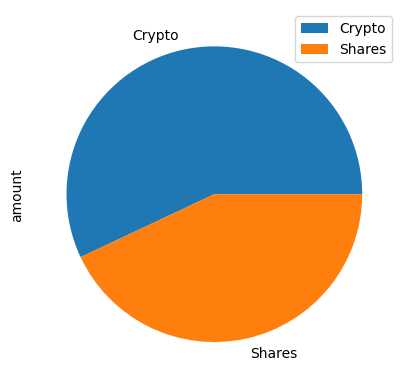

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y='amount')

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_shares + total_crypto

# Validate saving health
# YOUR CODE HERE!
if total_savings >= emergency_fund: 
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings < emergency_fund: 
    print("You do not have enough money in your emergency fund")


Congratulations! You have enough money in your emergency fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [19]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [20]:
# Get 5 years' worth of historical data for SPY and AGG
tickers = ['SPY', 'AGG']
timeframe = TimeFrame.Day
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
df_stock_data = api.get_bars(tickers, timeframe, start_date, end_date).df

# Display sample data
df_stock_data

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2016-05-02 04:00:00+00:00,110.74,110.7400,110.5200,110.605,3553939,15119,110.627199,AGG
2016-05-03 04:00:00+00:00,110.89,110.9450,110.7500,110.810,3044940,15662,110.865995,AGG
2016-05-04 04:00:00+00:00,110.91,110.9315,110.7595,110.860,2920608,13982,110.879063,AGG
2016-05-05 04:00:00+00:00,110.92,111.1600,110.8010,111.140,3008142,15707,111.028363,AGG
2016-05-06 04:00:00+00:00,111.12,111.1200,110.9700,110.970,2718710,12697,111.031967,AGG
...,...,...,...,...,...,...,...,...
2021-04-26 04:00:00+00:00,417.44,418.2200,416.8111,417.610,51824860,295870,417.508245,SPY
2021-04-27 04:00:00+00:00,417.93,418.1400,416.3000,417.520,50297139,296300,417.481360,SPY
2021-04-28 04:00:00+00:00,417.81,419.0100,416.9000,417.400,50692781,330049,417.742098,SPY


In [21]:
AGG = df_stock_data[df_stock_data["symbol"]=='AGG'].drop("symbol",axis=1)
SPY = df_stock_data[df_stock_data["symbol"]=="SPY"].drop("symbol",axis=1)
df_combine = pd.concat([SPY, AGG], axis=1, keys=["SPY","AGG"])
df_combine.head()

SPY                                       \
                             open    high     low     close     volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  206.92  208.18  206.41  207.9700   61908515   
2016-05-03 04:00:00+00:00  206.52  206.80  205.28  206.1592  106422142   
2016-05-04 04:00:00+00:00  204.99  205.85  204.42  205.0100   92199810   
2016-05-05 04:00:00+00:00  205.56  205.98  204.47  204.9700   67597222   
2016-05-06 04:00:00+00:00  204.08  205.77  203.88  205.7200   89131004   

                                                      AGG                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2016-05-02 04:00:00+00:00      263580  207.294812  110.74  110.7400  110.5200   
2016-05-03 04:00:00+00:00      377518  206.312060  110.89  110.9450  110.7500   
2016-05-04 04:00:00+00:00      345261  205.090172  110.91  110.9315  110.7595   
2016-05-05 04:00:00+00:00      280622  205.141555  110.92  111.1600  110.8010   
2016-05-06 04:00:00+00:00      340335  204.937074  111.12  111.1200  110.9700   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2016-05-02 04:00:00+00:00  110.605  3553939       15119  110.627199  
2016-05-03 04:00:00+00:00  110.810  3044940       15662  110.865995  
2016-05-04 04:00:00+00:00  110.860  2920608       13982  110.879063  
2016-05-05 04:00:00+00:00  111.140  3008142       15707  111.028363  
2016-05-06 04:00:00+00:00  110.970  2718710       12697  111.031967

In [22]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
num_sims = 500 
MC_portfolio = MCSimulation(
    portfolio_data=df_combine, 
    weights = [.5,.5],
    num_simulation= num_sims, 
    num_trading_days=252*30
)

In [23]:
# Printing the simulation input data
# YOUR CODE HERE!

In [24]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006242,0.999799,0.991760,1.002619,1.005672,0.996291,1.000334,0.991885,0.993783,1.005539,...,1.007867,1.005308,0.997609,1.005903,0.992708,0.992174,1.004568,1.000454,0.999235,0.992629
2,1.007422,1.010924,1.001121,1.010911,1.006536,0.986632,0.996181,0.985031,0.994759,1.006490,...,1.008125,1.008707,0.995576,1.005475,0.986290,0.994357,0.994042,0.988577,1.006642,0.996713
3,1.016753,1.017319,1.009730,1.011365,0.998310,0.981809,0.995577,0.984344,0.996577,1.005388,...,1.012704,1.011731,0.992742,1.001670,0.991963,0.989673,0.993868,0.978891,1.003970,1.008528
4,1.025620,1.021640,1.017531,1.008226,0.994927,0.984212,0.996909,0.986483,0.994878,1.011047,...,1.018422,1.013830,0.990595,0.985249,0.996503,0.983290,0.993903,0.983098,1.007965,1.001076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,10.370404,13.849495,11.729907,19.215639,18.787023,4.388901,14.112503,9.290745,5.600972,13.740484,...,8.137381,11.104771,11.307870,4.652418,18.192040,3.520140,14.545761,8.481155,8.308900,10.663244
7557,10.314808,13.792209,11.779698,19.441815,18.666463,4.398706,14.144547,9.336424,5.647625,13.648382,...,8.137025,11.016033,11.207034,4.654061,18.303944,3.488619,14.471388,8.372458,8.313385,10.693396
7558,10.238158,13.855485,11.806470,19.579968,18.750395,4.393054,14.194396,9.369616,5.665475,13.592362,...,8.092517,10.998897,11.295998,4.653698,18.295360,3.447983,14.529787,8.427162,8.356789,10.776072
7559,10.067190,13.926297,11.775936,19.349386,18.593132,4.379968,14.275555,9.345196,5.611371,13.672193,...,8.099699,10.999301,11.311701,4.682528,18.379284,3.433533,14.533749,8.433611,8.395254,10.806340


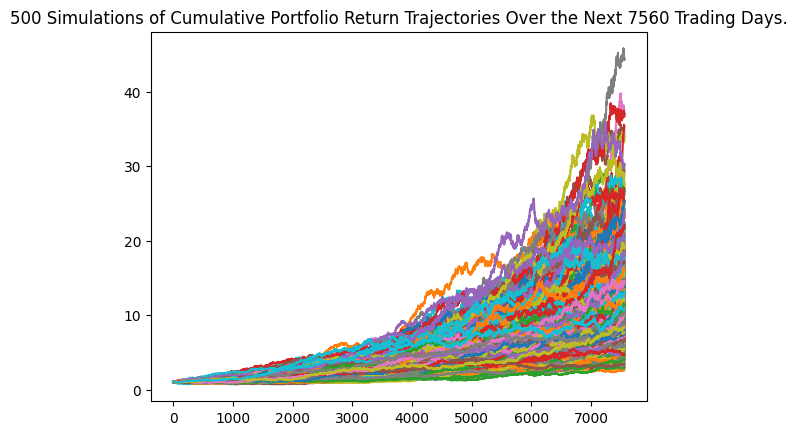

In [25]:
# Plot simulation outcomes
# YOUR CODE HERE! 
line_plot = MC_portfolio.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30_year_sim_plot.png", bbox_inches="tight")

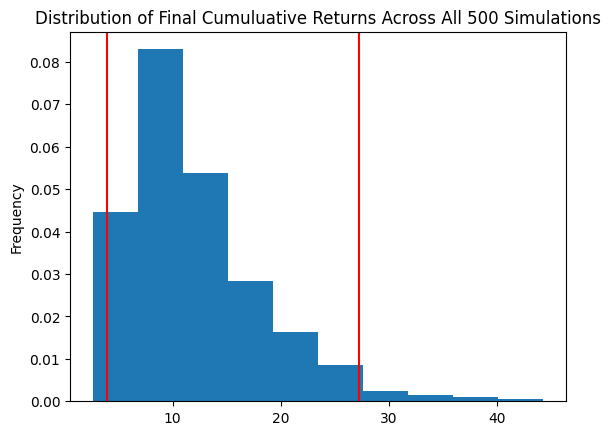

In [26]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_portfolio.plot_distribution()

dist_plot.get_figure().savefig('MC_30_year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)
# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean             11.964610
std               6.316490
min               2.592523
25%               7.511420
50%              10.343929
75%              14.958299
max              44.312962
95% CI Lower      3.881177
95% CI Upper     27.246815
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [28]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $77623.54 and $544936.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [29]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $116435.31 and $817404.46


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
num_simulations = 1000 

MC_Portfolio_five_year = MCSimulation( 
    portfolio_data=df_combine, 
    num_simulation = num_simulations, 
    num_trading_days= 252*5
)

In [31]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_Portfolio_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012534,0.992935,0.991436,1.003647,0.983823,1.002709,0.994444,0.989400,1.001027,1.007974,...,1.001054,1.000025,1.004527,0.995755,1.005427,1.003901,0.999057,0.994496,0.997073,0.999618
2,1.012592,0.993720,1.000598,1.009593,0.987994,1.006895,0.991609,0.992805,1.005367,1.020191,...,0.985121,1.007391,1.000435,1.003874,0.995828,0.994993,0.996946,0.993872,0.995137,1.001157
3,1.008432,1.000893,0.999890,1.009611,0.988746,1.016048,0.996939,0.999814,1.015618,1.018827,...,0.981451,1.005923,0.993725,0.995155,0.999691,0.989517,1.004230,0.992223,0.988406,1.000320
4,1.006216,1.001946,1.001257,1.008431,0.977296,1.029854,0.987478,0.999529,1.011517,1.013295,...,0.975076,1.007228,0.984414,0.995896,1.005469,0.987156,1.007085,1.004594,0.982685,1.000259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.012617,1.559632,2.188745,1.263588,1.139988,1.279987,1.378932,1.469056,1.882123,1.363664,...,1.789714,1.368772,1.879954,1.599534,1.872131,1.476635,1.743354,1.346628,1.240085,1.497038
1257,1.012183,1.567636,2.184390,1.272072,1.145731,1.267747,1.381854,1.474954,1.897983,1.371019,...,1.780699,1.363737,1.877135,1.590041,1.884237,1.488164,1.750718,1.344649,1.242721,1.487139
1258,1.011039,1.567083,2.203392,1.266159,1.157660,1.275468,1.388395,1.473321,1.901924,1.363392,...,1.791985,1.369848,1.889388,1.590175,1.907035,1.477216,1.749336,1.354160,1.250679,1.494775
1259,1.012350,1.572576,2.210657,1.267601,1.169301,1.273746,1.383571,1.486801,1.906545,1.375666,...,1.808436,1.372093,1.891765,1.583926,1.901580,1.481715,1.758851,1.347092,1.250592,1.502047


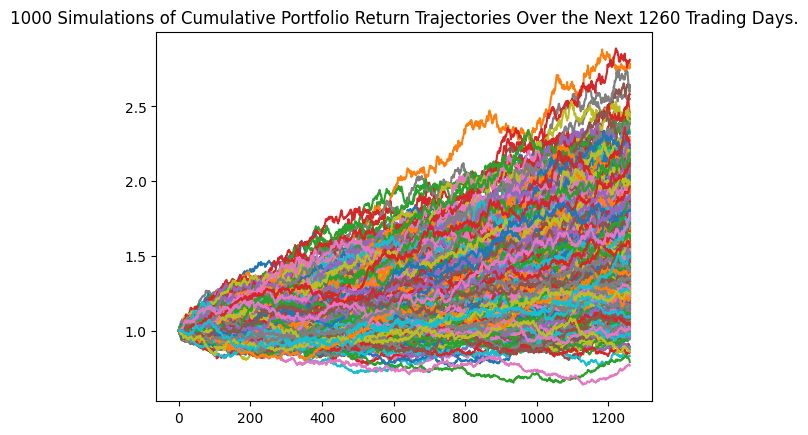

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_Portfolio_five_year.plot_simulation()

line_plot.get_figure().savefig("MC_5_year_sim_plot.png", bbox_inches="tight")


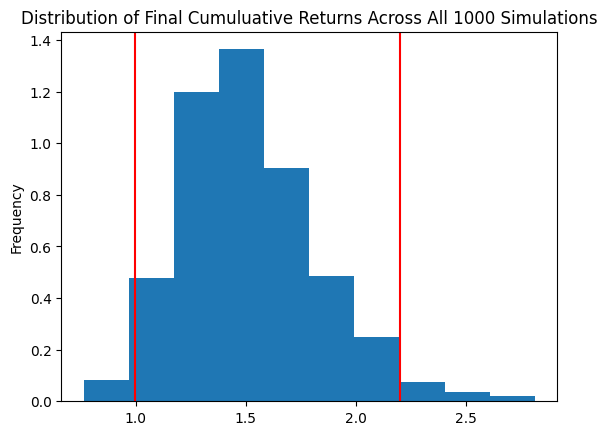

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_Portfolio_five_year.plot_distribution()
dist_plot.get_figure().savefig('MC_5_year_dist_plot.png',bbox_inches='tight')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_5_year = MC_Portfolio_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_5_year)

count           1000.000000
mean               1.517784
std                0.311307
min                0.765422
25%                1.297088
50%                1.491864
75%                1.705171
max                2.811205
95% CI Lower       0.995829
95% CI Upper       2.202048
Name: 1260, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl_5_year[8]*initial_investment,2)
ci_upper_five = round(tbl_5_year[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $59749.77 and $132122.87


### Ten Years Retirement Option

In [36]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
num_sims = 500

MC_Portfolio_ten_year = MCSimulation( 
    portfolio_data= df_combine, 
    num_simulation= num_sims, 
    num_trading_days= 252*10
)

In [37]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_Portfolio_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000060,1.007875,1.000921,0.995790,1.002047,1.007833,1.004146,0.992475,0.999173,1.003391,...,1.007712,0.991756,0.990158,0.984695,1.006600,0.997474,1.004198,1.011752,0.994334,0.990932
2,0.999212,1.007970,1.004054,1.001465,0.995459,1.010556,1.001669,0.993517,0.997403,1.000049,...,1.013925,0.988558,0.984728,0.986484,1.006638,1.003782,0.995921,1.009048,1.005115,0.982320
3,1.002775,1.005808,1.004958,1.005057,0.998552,1.007187,1.006470,0.992981,1.001936,1.004907,...,1.010534,0.993343,0.989623,0.990767,1.015376,1.006216,0.988980,0.998694,0.999889,0.982209
4,1.000532,1.007098,1.006398,1.010796,0.986408,1.002979,1.006460,0.992259,1.002219,1.002814,...,1.016403,0.997967,0.993443,0.991787,1.008854,1.013881,0.986857,1.009779,1.000198,0.985607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.778735,2.336599,2.171140,3.910126,1.606769,1.826117,2.394187,2.068822,1.218232,2.352923,...,1.748306,2.027432,2.365654,2.849819,2.083077,2.229208,2.687574,1.487659,2.779915,1.490461
2517,1.774959,2.339601,2.189915,3.882064,1.604523,1.819312,2.406498,2.083500,1.225993,2.329453,...,1.738102,2.043198,2.360037,2.862162,2.051677,2.208353,2.685638,1.480271,2.757520,1.493886
2518,1.769975,2.328156,2.193566,3.840517,1.614943,1.828396,2.401166,2.068380,1.224783,2.334877,...,1.734591,2.044271,2.359907,2.831932,2.037359,2.198564,2.681616,1.482515,2.766090,1.480355
2519,1.788967,2.330099,2.197325,3.838092,1.604437,1.818972,2.396671,2.074191,1.225766,2.318187,...,1.745129,2.042219,2.368642,2.840130,2.050273,2.177155,2.666419,1.489011,2.774373,1.471756


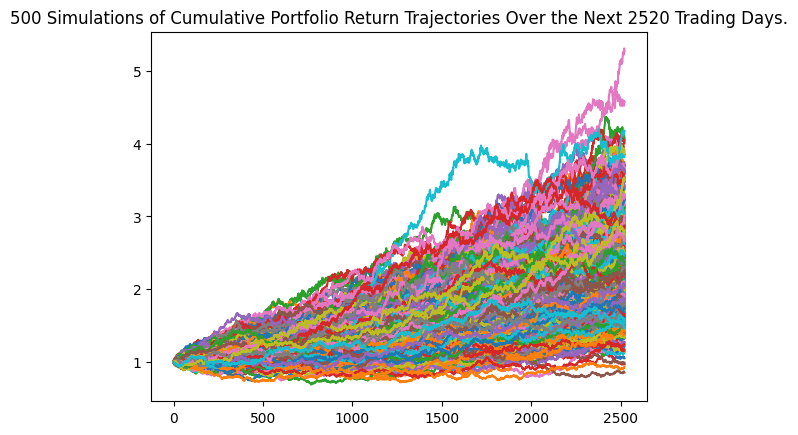

In [38]:
# Plot simulation outcomes
# YOUR CODE HERE!
MC_Portfolio_ten_year.plot_simulation()
line_plot.get_figure().savefig("MC_10_year_sim_plot.png", bbox_inches="tight")


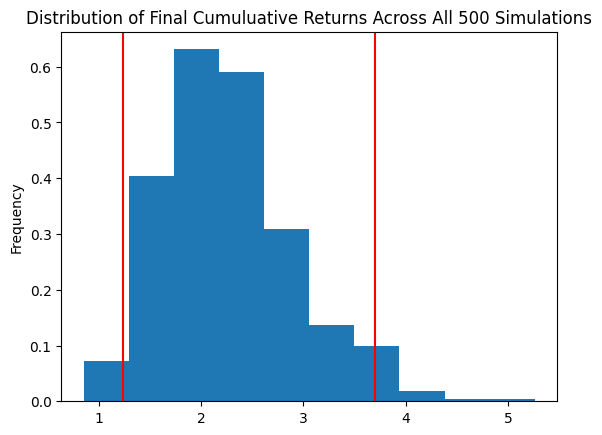

In [39]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_Portfolio_ten_year.plot_distribution()

dist_plot.get_figure().savefig('MC_10_year_dist_plot.png',bbox_inches='tight')

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl_10_year = MC_Portfolio_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl_10_year)

count           500.000000
mean              2.264623
std               0.645464
min               0.856248
25%               1.817226
50%               2.193881
75%               2.632094
max               5.260227
95% CI Lower      1.238957
95% CI Upper      3.702405
Name: 2520, dtype: float64


In [41]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl_10_year[8]*initial_investment,2)
ci_upper_ten = round(tbl_10_year[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $74337.41 and $222144.28
